<a href="https://colab.research.google.com/github/zarkaltair/Python-frameworks/blob/master/%D0%A2%D0%B5%D1%81%D1%82_%D1%80%D0%B0%D0%B7%D0%B2%D0%B5%D0%B4%D0%BE%D1%87%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

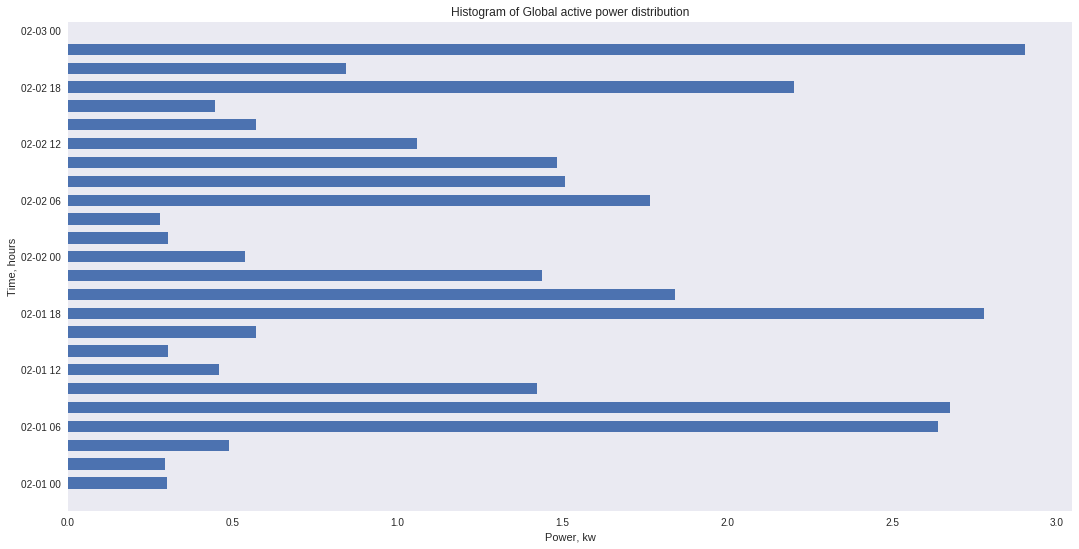

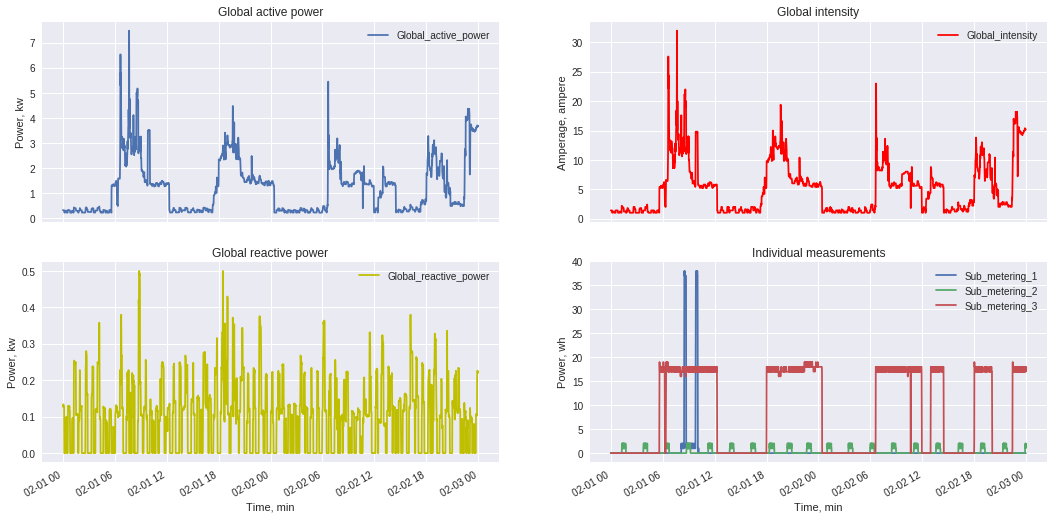

In [10]:
import pandas as pd

import matplotlib.pyplot as plt


# display options for output pandas
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10
pd.options.display.expand_frame_repr = False

# read file
df = pd.read_csv('test.txt', 
                  sep=';', 
                  low_memory=False, 
                  parse_dates=[['Date', 'Time']], 
                  date_parser=lambda date: pd.to_datetime(date, format='%d/%m/%Y %H:%M:%S'), 
                  index_col='Date_Time', 
)
# create DataFrame for 1-2 february
# convert all elements to float
feb_df = df.loc['2007-02-01':'2007-02-02'].apply(pd.to_numeric)

# resize column to 2 hour for more information
hours_df = feb_df['Global_active_power'].resample('2h').mean()
# create histogram
fig, ax = plt.subplots(figsize=(18, 9))
# properties for plotting
ax.barh(hours_df.index, hours_df, align='center', height=0.05)
labels = ax.get_xticklabels()
# prooerties for figure
ax.set(xlabel='Power, kw', 
       ylabel='Time, hours', 
       title='Histogram of Global active power distribution')
ax.grid()
plt.show()


# properties for plotting graphs
fig, (ax1, ax2) = plt.subplots(figsize=(18, 9), nrows=2, ncols=2, sharex=True)
ax1[0].plot(feb_df['Global_active_power'])
ax1[1].plot(feb_df['Global_intensity'], color='r')
ax2[0].plot(feb_df['Global_reactive_power'], color='y')
sub_metering_df = df.loc['2007-02-01':'2007-02-02', ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].apply(pd.to_numeric)
ax2[1].plot(sub_metering_df)
ax1[1].set_xticks(ax1[1].get_xticks()[::1])
ax2[1].set_xticks(ax2[1].get_xticks()[::1])

# subplot 1
ax1[0].set_title('Global active power')
ax1[0].set_ylabel('Power, kw')
ax1[0].legend()
ax1[0].grid(True)

# subplot 2
ax1[1].set_title('Global intensity')
ax1[1].set_ylabel('Amperage, ampere')
ax1[1].legend()
ax1[1].grid(True)

# subplot 3
ax2[0].set_title('Global reactive power')
ax2[0].set_xlabel('Time, min')
ax2[0].set_ylabel('Power, kw')
ax2[0].legend()
ax1[1].grid(True)

# subplot 4
ax2[1].set_title('Individual measurements')
ax2[1].set_xlabel('Time, min')
ax2[1].set_ylabel('Power, wh')
ax2[1].legend(('Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'))
ax2[1].grid(True)

plt.gcf().autofmt_xdate()
plt.show()